# Модуль 1. Занятие 6. Библиотеки визуализации данных Matplotlib, Seaborn, Altair, Plotly Express
Датасет содержит следующие основные категории данных:

Категории товаров (например, "Овощи", "Кондитерские изделия", "Мясо/Птица" и т.д.).
Город и страна клиентов.
Компания-перевозчик и информация о клиентах.
Количество и стоимость товаров на единицу (как себестоимость, так и розничная цена).
Данные по продажам, включая прибыль и количество проданных единиц.

## Возможные кейсы для визуализации:
### Географическое распределение продаж:

Визуализация, показывающая продажи по городам и странам.
Использовать столбчатую диаграмму или тепловую карту с помощью библиотеки Plotly Express или Matplotlib.
### Категории товаров и прибыль:

Построение круговой диаграммы или гистограммы для анализа того, какие категории товаров приносят наибольшую прибыль.
### Анализ корреляции цены и продаж:

График рассеивания (scatter plot), чтобы показать, как цена на единицу товара соотносится с количеством проданных товаров.
### Поставки и заказы:

Визуализировать количество товаров на складе и заказы с помощью столбчатых диаграмм (bar plot) для сравнения поставок и спроса.
### Прибыль по странам:

Столбчатая диаграмма, показывающая прибыль по странам, чтобы определить, где продажа наиболее выгодна.

## 1. Загрузка данных.
Нужно загрузить датасет Product Gallery.

In [2]:
!pip install seaborn
!pip install altair
!pip install plotly
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 3.0 MB/s eta 0:00:00


In [3]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Загрузка данных
data = pd.read_excel('./Product Gallery.xlsx')
display(data)

FileNotFoundError: [Errno 2] No such file or directory: './Product Gallery.xlsx'

## 2. Подготовка данных.
Произвести первичную чистку данных и разделить данные на датасеты для дальнейшего визуального анализа.

In [ ]:
# Общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Address               2172 non-null   object        
 1   CategoryID            2172 non-null   int64         
 2   Category              2172 non-null   object        
 3   City                  2172 non-null   object        
 4   Customer Company      2172 non-null   object        
 5   Shippers Company      2172 non-null   object        
 6   Customer              2172 non-null   object        
 7   Country               2172 non-null   object        
 8   EmployeeID            2172 non-null   int64         
 9   Fax                   1619 non-null   object        
 10  OrderDate             2172 non-null   datetime64[ns]
 11  OrderID               2172 non-null   int64         
 12  Phone                 2172 non-null   object        
 13  PostalCode        

In [ ]:
# Первичный анализ данных
data.describe()

,CategoryID,EmployeeID,OrderDate,OrderID,ProductID,ShipperID,SupplierID,Discount,Freight,Quantity,QuantityPerUnit,UnitCost,UnitPrice,UnitPrice (Products),UnitsInStock,UnitsOnOrder,Sales,Profit
count,2172.000000,2172.000000,2172,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000
mean,3.872007,4.971915,2006-04-04 09:50:03.314917248,10662.680479,40.710866,1.988950,14.471915,0.055953,50.420506,23.918969,23.702578,26.499075,32.378715,32.423168,39.779466,8.135359,770.272564,140.114323
min,1.000000,1.000000,2003-11-20 00:00:00,10248.000000,1.000000,1.000000,1.000000,0.000000,12.450000,1.000000,1.000000,0.890000,0.990000,1.100000,0.000000,0.000000,2.120000,-6.950000
25%,2.000000,3.000000,2005-10-30 18:00:00,10452.000000,22.000000,2.000000,7.000000,0.000000,34.900000,10.000000,1.000000,7.400000,9.247500,9.450000,17.000000,0.000000,147.512500,21.375000
50%,3.000000,5.000000,2006-06-03 12:00:00,10659.500000,41.000000,2.000000,14.000000,0.000000,50.460000,20.000000,15.000000,16.170000,19.775000,19.900000,25.000000,0.000000,327.630000,51.250000
75%,6.000000,8.000000,2006-11-30 06:00:00,10868.250000,60.000000,2.000000,21.000000,0.100000,65.670000,30.000000,26.000000,26.490000,31.975000,31.230000,57.000000,0.000000,755.850000,124.650000
max,8.000000,9.000000,2007-07-30 00:00:00,11083.000000,77.000000,3.000000,29.000000,0.250000,79.960000,150.000000,105.000000,304.700000,432.530000,399.000000,125.000000,100.000000,36462.600000,9039.600000
std,2.351085,2.870720,NaN,243.294300,22.175948,0.595444,8.236299,0.083202,17.351569,19.167781,28.577191,42.485014,54.376570,54.974896,36.059149,19.814294,1853.097798,413.404456


In [ ]:
data.isna().sum()

,0
Address,0
CategoryID,0
Category,0
City,0
Customer Company,0
Shippers Company,0
Customer,0
Country,0
EmployeeID,0
Fax,553


In [ ]:
# Проверка на наличие пропусков
print(data.isnull().sum())

Address                    0
CategoryID                 0
Category                   0
City                       0
Customer Company           0
Shippers Company           0
Customer                   0
Country                    0
EmployeeID                 0
Fax                      553
OrderDate                  0
OrderID                    0
Phone                      0
PostalCode                 0
ProductID                  0
Product                    0
ShipperID                  0
StateProvince           1818
SupplierID                 0
Discount                   0
Freight                    0
Quantity                   0
QuantityPerUnit            0
UnitCost                   0
UnitPrice                  0
UnitPrice (Products)       0
UnitsInStock               0
UnitsOnOrder               0
Sales                      0
Profit                     0
City and Counry            0
dtype: int64


In [ ]:
# Очистка данных (удаление столбцов с множественными пропусками)
data_clean = data.drop(columns=['Fax', 'StateProvince'])

### Дополнительный анализ для дальнейшего построения модели
Возможные задачи для моделирования:

<b>1. Прогнозирование продаж:</b> <br>
Целевая переменная: Sales (Продажи). <br>
Важные признаки: цена товара, количество на складе, количество заказов, категория товара, страна покупателя и др.

<b>2. Прогнозирование прибыли:</b> <br>
Целевая переменная: Profit (Прибыль). <br>
Важные признаки: цена товара, количество проданных единиц, страна и город клиента, категория товара и т.д.

<b>3. Прогнозирование спроса:</b><br>
Целевая переменная: UnitsOnOrder (Количество товаров в заказе).<br>
Важные признаки: текущие запасы на складе, категория товара, цена за единицу, продажи и т.д. <br><br>
Для лучшего понимания данных можно использовать такие методы визуализации, как гистограммы (распределение количественных целевых переменных) и боксплоты (для выявления выбросов).

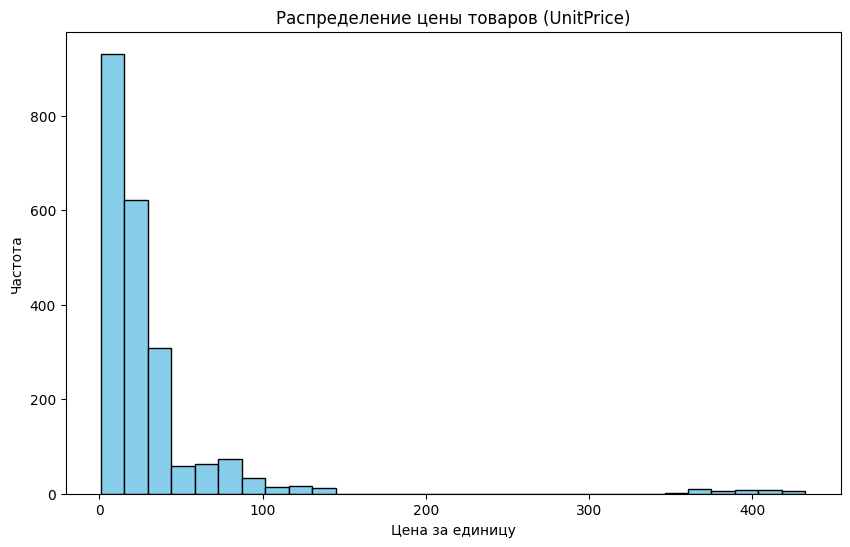

In [ ]:
# Гистограмма для распределения цен товаров (UnitPrice)
plt.figure(figsize=(10, 6))
plt.hist(data_clean['UnitPrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение цены товаров (UnitPrice)')
plt.xlabel('Цена за единицу')
plt.ylabel('Частота')
plt.show()

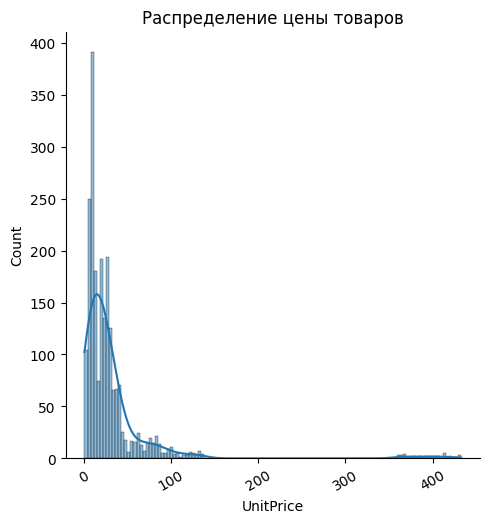

In [ ]:
#Гистограмма с использованием библиотеки Seaborn
g = sns.displot(data_clean, x="UnitPrice", kde=True)
g.set(title="Распределение цены товаров")
plt.xticks(rotation=30)
plt.show()

In [ ]:
print("Mean:", data_clean["UnitPrice"].mean())
print("Median:", data_clean["UnitPrice"].median())
print("Skewness:", data_clean["UnitPrice"].skew())
print("Kurtosis:", data_clean["UnitPrice"].kurtosis())

Mean: 32.37871546961326
Median: 19.775
Skewness: 5.390129698854638
Kurtosis: 32.68468775486767


Давайте разберем, что означают эти статистические метрики для гистограммы и как они интерпретируются:

<b>Mean (Среднее значение)</b>: Это просто среднее арифметическое значение всех данных в выборке. В данном случае оно равно 32.38. Среднее отражает общий центр данных, но при наличии сильно смещённых данных может не точно отображать типичное значение (в отличие от медианы).

<b>Median (Медиана)</b>: Это центральное значение выборки, то есть половина данных находится ниже этого значения, а половина — выше. В данном случае медиана равна 19.78, что значительно меньше среднего. Это указывает на то, что в данных есть выбросы (очень большие значения), которые смещают среднее значение вверх.

<b>Skewness (Скос, асимметрия)</b>: Эта метрика показывает асимметрию распределения данных:

Если skewness = 0, данные симметрично распределены.
Если skewness > 0, распределение смещено вправо (правый "хвост" длиннее). В данном случае скос = 5.39, что говорит о значительном правом смещении (в данных есть много высоких значений, которые создают длинный хвост справа).
Если skewness < 0, распределение смещено влево (левый "хвост" длиннее).
                  
<b>Kurtosis (Куртозис)</b>: Это мера "высоты" или "остроты" пика распределения:

Если kurtosis = 3, распределение считается нормальным.
Если kurtosis > 3, распределение более "остроконечное" (острый пик и более длинные хвосты). В данном случае куртозис равен 32.68, что говорит о том, что распределение имеет очень острый пик и длинные хвосты, что может свидетельствовать о наличии выбросов.
Если kurtosis < 3, распределение более плоское, чем нормальное.

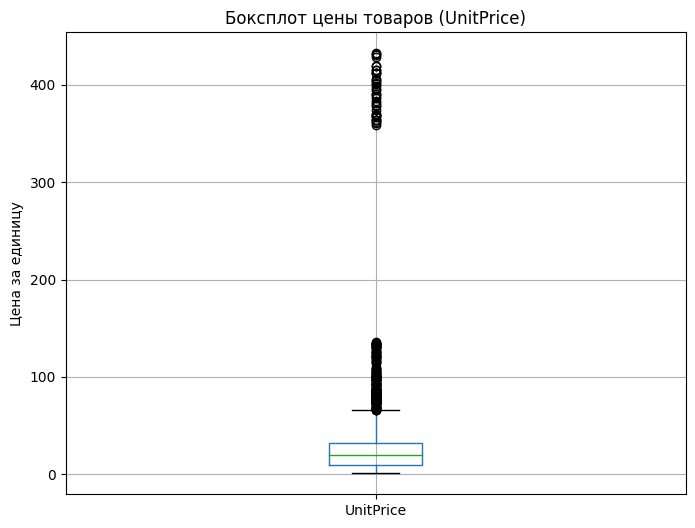

In [ ]:
# Визуализируем боксплот для выявления выбросов
plt.figure(figsize=(8, 6))
data_clean.boxplot(column='UnitPrice')
plt.title('Боксплот цены товаров (UnitPrice)')
plt.ylabel('Цена за единицу')
plt.show()

In [ ]:
data[['UnitPrice']].describe()

,UnitPrice
count,2172.000000
mean,32.378715
std,54.376570
min,0.990000
25%,9.247500
50%,19.775000
75%,31.975000
max,432.530000


In [ ]:
# Удалим выбросы
data_clean_filtered = data_clean[data_clean['UnitPrice'] <= 100]

## Самостоятельно!!!
Построить диаграммы распределения и боксплоты для двух оставшихся кейсов (Profit - прибыль, UnitsOnOrder - спрос). Подсчитать статистические метрики и сделать выводы на основе анализа.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Задание 1

In [ ]:
# Гистограмма для распределения прибыли (Profit)
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, kde=True, color='skyblue')
plt.title('Распределение прибыли (Profit)', fontsize=14)
plt.xlabel('Прибыль', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)
plt.show()


KeyError: 'Profit'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Расчет статистических метрик
profit_mean = df['Profit'].mean()
profit_median = df['Profit'].median()
profit_std = df['Profit'].std()
profit_min = df['Profit'].min()
profit_max = df['Profit'].max()

print(f"Средняя прибыль: {profit_mean}")
print(f"Медианная прибыль: {profit_median}")
print(f"Стандартное отклонение прибыли: {profit_std}")
print(f"Минимальная прибыль: {profit_min}")
print(f"Максимальная прибыль: {profit_max}")

KeyError: 'Profit'

Выводы на основе анализа:
1. Есть отрицательная прибыль
2. Меньше прибыль чаще частота

In [ ]:
# Боксплот для выявления выбросов по прибыли (Profit)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'], color='lightgreen')
plt.title('Боксплот для прибыли (Profit)', fontsize=14)
plt.xlabel('Прибыль', fontsize=12)
plt.grid(True)
plt.show()

KeyError: 'Profit'

<Figure size 1000x600 with 0 Axes>

### Задание 2

In [ ]:
# Гистограмма для распределения количества товаров в заказе (спрос - UnitsOnOrder)
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitsOnOrder'], bins=30, kde=True, color='orange')
plt.title('Распределение количества товаров в заказе (UnitsOnOrder)', fontsize=14)
plt.xlabel('Количество товаров в заказе', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)
plt.show()


KeyError: 'UnitsOnOrder'

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Расчет статистических метрик
units_on_order_mean = df['UnitsOnOrder'].mean()
units_on_order_median = df['UnitsOnOrder'].median()
units_on_order_std = df['UnitsOnOrder'].std()
units_on_order_min = df['UnitsOnOrder'].min()
units_on_order_max = df['UnitsOnOrder'].max()

print(f"Среднее количество товаров в заказе: {units_on_order_mean}")
print(f"Медианное количество товаров в заказе: {units_on_order_median}")
print(f"Стандартное отклонение для товаров в заказе: {units_on_order_std}")
print(f"Минимальное количество товаров в заказе: {units_on_order_min}")
print(f"Максимальное количество товаров в заказе: {units_on_order_max}")

KeyError: 'UnitsOnOrder'

Выводы на основе анализа:
1. Есть заказы с 0м товаров
2. Макс товаров 100
3. Среднее количество товаров в заказе 0

In [ ]:
# Боксплот для выявления выбросов по спросу (UnitsOnOrder)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UnitsOnOrder'], color='lightcoral')
plt.title('Боксплот для количества товаров в заказе (UnitsOnOrder)', fontsize=14)
plt.xlabel('Количество товаров в заказе', fontsize=12)
plt.grid(True)
plt.show()

KeyError: 'UnitsOnOrder'

<Figure size 1000x600 with 0 Axes>

## 3. Визуальный анализ данных.
Импортировать нужные библиотеки для визуализации данных, провести анализ на подготовленных датасетах.

### Кейс 1. Визуализация продаж по странам

In [ ]:
# Группировка данных для анализа
sales_by_country = data_clean.groupby('Country')['Sales'].sum().sort_values(ascending=False)
display(sales_by_country)

,Sales
Country,
Германия,485584.59
США,175207.45
Франция,163023.46
Англия,159050.35
Ирландия,120207.25
Бразилия,113513.47
Мексика,83423.07
Венесуэла,62294.39
Дания,56520.60


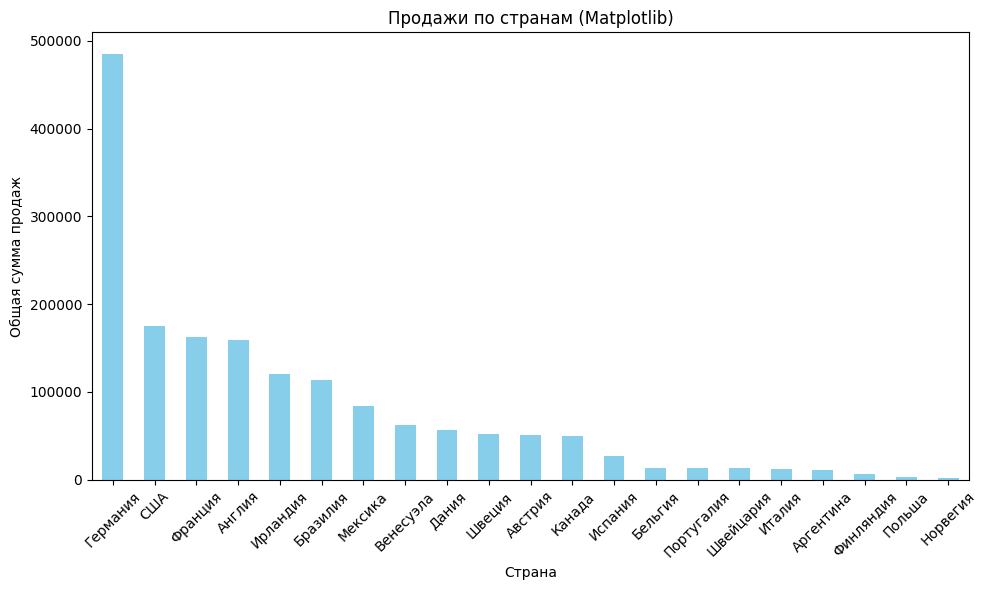

In [ ]:
# Визуализация с помощью библиотеки Matplotlib
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar', color='skyblue')
plt.title('Продажи по странам (Matplotlib)')
plt.xlabel('Страна')
plt.ylabel('Общая сумма продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

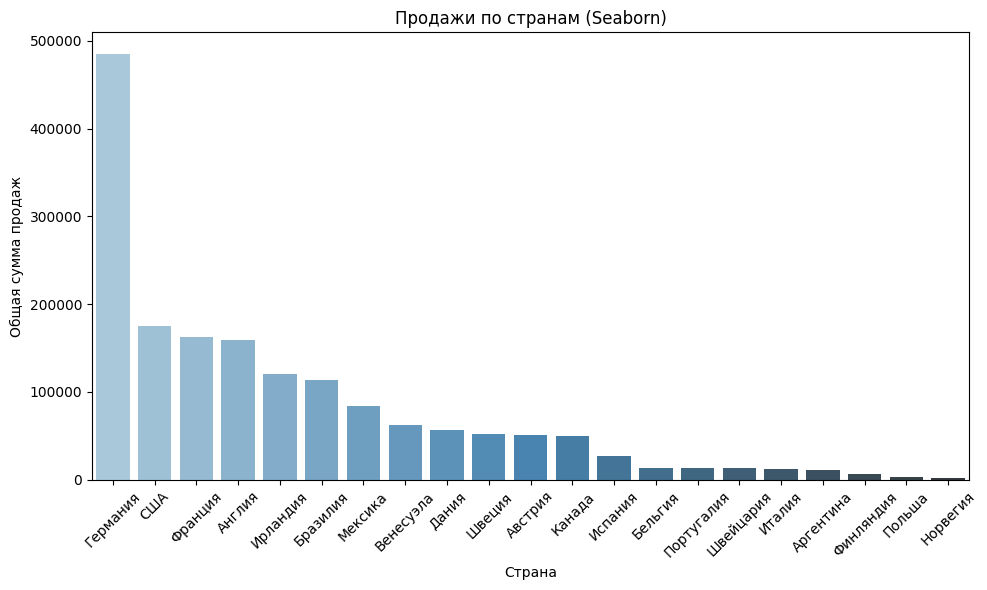

In [ ]:
# Визуализация с помощью библиотеки seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette="Blues_d")
plt.title('Продажи по странам (Seaborn)')
plt.xlabel('Страна')
plt.ylabel('Общая сумма продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

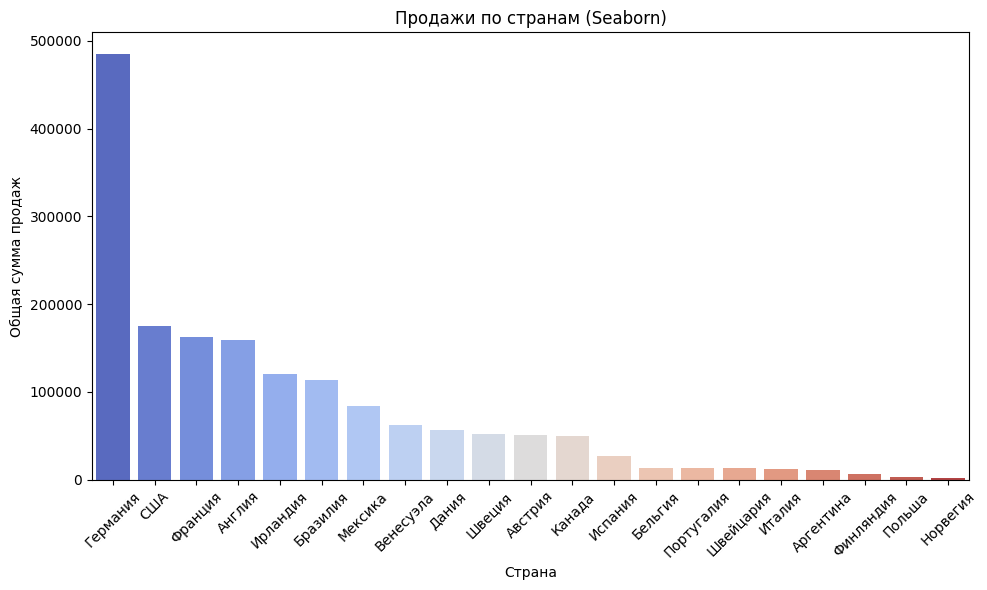

In [ ]:
# Визуализация с помощью библиотеки seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette=custom_palette)
plt.title('Продажи по странам (Seaborn)')
plt.xlabel('Страна')
plt.ylabel('Общая сумма продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
custom_palette = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#9B59B6']

In [ ]:
custom_palette = sns.color_palette("coolwarm", len(data_clean['Country'].value_counts().index))

In [ ]:
# Интерактивная визуализация с помощью библиотеки Altair
sales_by_country_alt = pd.DataFrame({
    'Country': sales_by_country.index,
    'Sales': sales_by_country.values
})
alt.Chart(sales_by_country_alt).mark_bar().encode(
    x=alt.X('Country:N', sort='-y'),
    y='Sales:Q'
).properties(
    width=600,
    height=400,
    title='Продажи по странам (Altair)'
).interactive()


alt.Chart(...)

In [ ]:
# # Визуализация с помощью библиотеки Plotly
# px.bar(sales_by_country, title='Продажи по странам (Plotly Express)', labels={'index': 'Страна', 'value': 'Продажи'})

In [5]:
!pip install hvplot
!pip install holoviews
!pip install geopandas
!pip install geoviews
!pip install panel

INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.2/563.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.3
    Uninstalling bokeh-3.4.3:
      Successfully uninstalled bokeh-3.4.3
  Attempting uninstall: panel
    Found existing installation: panel 1.4.5
    Uninstalling panel-1.4.5:
      Successfully uninstalled panel-1.4.5


In [ ]:
import hvplot.pandas
import holoviews as hv
import geopandas as gpd
import geoviews as gv
from geoviews import opts
# jupyter labextension install @pyviz/jupyterlab_pyviz
import panel as pn
pn.extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
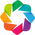

:Bars   [Country]   (Sales)

In [ ]:
hv.extension('bokeh') # Активируем расширение bokeh для интерактивных графиков
# Визуализация с помощью библиотеки Hvplot
data_clean.groupby('Country')['Sales'].sum().hvplot.bar(
    title='Продажи по странам (hvPlot)',
    xlabel='Страна', ylabel='Сумма продаж', rot=45, color='orange'
)

### Кейс 2. Прибыль по категориям товаров

In [ ]:
# Группировка данных для анализа
profit_by_category = data_clean.groupby('Category')['Profit'].sum().reset_index()

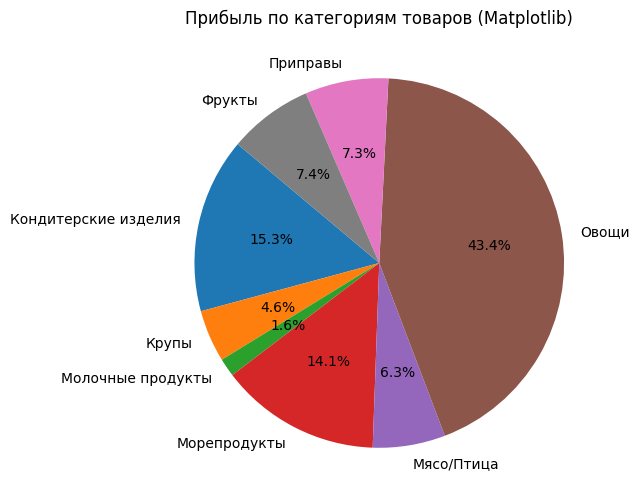

In [ ]:
# 2.1. Matplotlib
plt.figure(figsize=(10, 6))
profit_by_category.set_index('Category')['Profit'].plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Прибыль по категориям товаров (Matplotlib)')
plt.ylabel('')
plt.show()

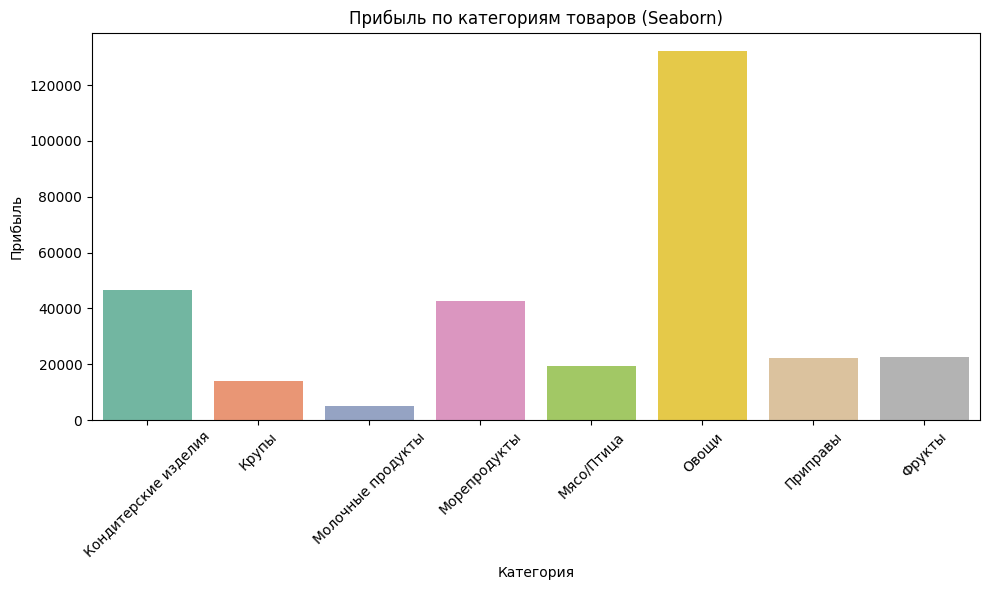

In [ ]:
# 2.2. Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=profit_by_category, palette='Set2')
plt.title('Прибыль по категориям товаров (Seaborn)')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2.3. Altair
alt.Chart(profit_by_category).mark_bar().encode(
    x='Category:N',
    y='Profit:Q'
).properties(
    width=600,
    height=400,
    title='Прибыль по категориям товаров (Altair)'
).interactive()

alt.Chart(...)

In [ ]:
# # 2.4. Plotly Express
# px.pie(profit_by_category, values='Profit', names='Category', title='Прибыль по категориям товаров (Plotly Express)')

In [ ]:
# 2.5. hvPlot
profit_by_category.hvplot.bar(
    title='Прибыль по категориям товаров (hvPlot)',
    xlabel='Категория', ylabel='Прибыль', color='green'
)

:Bars   [index]   (Profit)

### Кейс 3. Количество товаров на складе/в заказе (спрос-предложение)

<Figure size 1000x600 with 0 Axes>

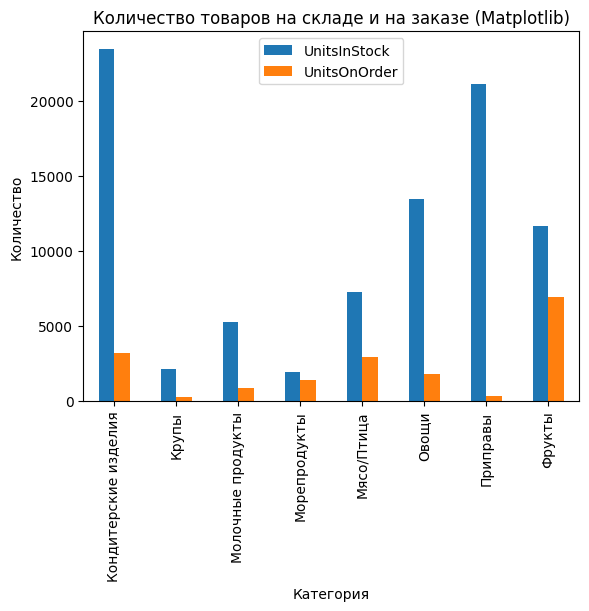

In [ ]:
# 3.1. Matplotlib
plt.figure(figsize=(10, 6))
data_clean.groupby('Category')[['UnitsInStock', 'UnitsOnOrder']].sum().plot(kind='bar')
plt.title('Количество товаров на складе и на заказе (Matplotlib)')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 3.2. Seaborn
units_data = data_clean.groupby('Category')[['UnitsInStock', 'UnitsOnOrder']].sum().reset_index()
units_data_melted = pd.melt(units_data, id_vars='Category', value_vars=['UnitsInStock', 'UnitsOnOrder'])

pd.melt() — функция, которая преобразует "широкие" данные в "длинные". Это нужно для построения графиков с несколькими переменными.
id_vars='Category' — это столбец, который останется неизменным (он играет роль идентификатора).<br>
value_vars=['UnitsInStock', 'UnitsOnOrder'] — столбцы, которые нужно "расплавить" (то есть собрать в два столбца: один для названия переменной, другой для значений).

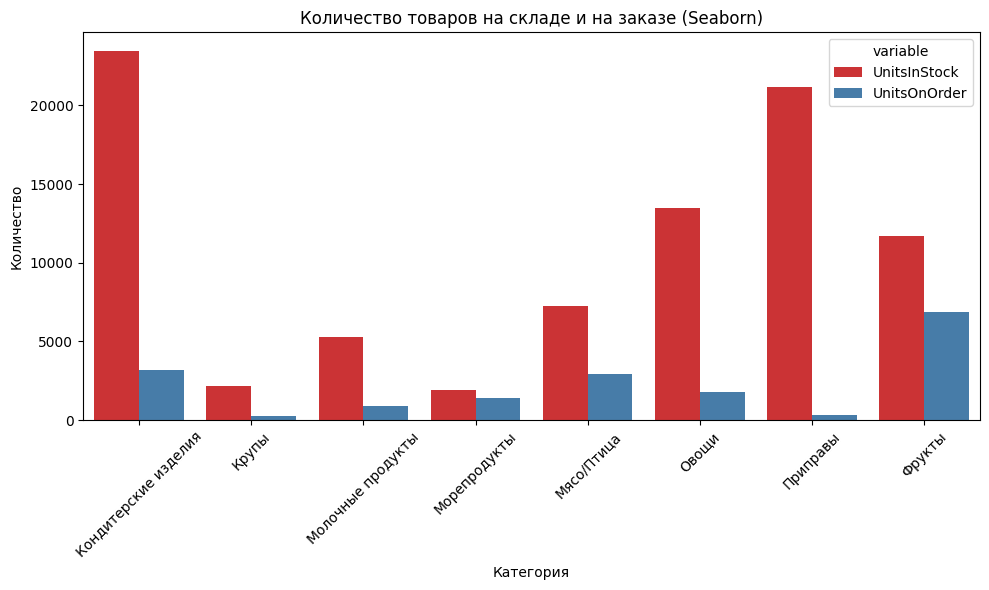

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='value', hue='variable', data=units_data_melted, palette='Set1')
plt.title('Количество товаров на складе и на заказе (Seaborn)')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 3.3. Altair
units_data_alt = units_data_melted.rename(columns={'variable': 'Type', 'value': 'Units'})
alt.Chart(units_data_alt).mark_bar().encode(
    x='Category:N',
    y='Units:Q',
    color='Type:N'
).properties(
    width=600,
    height=400,
    title='Количество товаров на складе и на заказе (Altair)'
).interactive()

alt.Chart(...)

In [ ]:
# # 3.4. Plotly Express
# px.bar(units_data, x='Category', y=['UnitsInStock', 'UnitsOnOrder'], barmode='group',
#        title='Количество товаров на складе и на заказе (Plotly Express)')

In [ ]:
# 3.5. hvPlot
units_data.hvplot.bar(
    x='Category', y=['UnitsInStock', 'UnitsOnOrder'],
    title='Количество товаров на складе и на заказе (hvPlot)', stacked=False
)

:Bars   [Category,Variable]   (value)

In [ ]:
# 3.5. hvPlot - исправление легенды
units_data.hvplot.bar(
    x='Category', y=['UnitsInStock', 'UnitsOnOrder'],
    title='Количество товаров на складе и на заказе (hvPlot)',
    stacked=False, rot=45, legend='top_left'
)


:Bars   [Category,Variable]   (value)

In [ ]:
# Построение графика с двумя линиями: спрос и предложение
data_clean.groupby('Category')[['UnitsInStock', 'UnitsOnOrder']].sum().reset_index().hvplot.line(
    x='Category',
    y=['UnitsInStock', 'UnitsOnOrder'],
    ylabel='Количество',
    xlabel='Категория товаров',
    title='Спрос и предложение по категориям товаров',
    legend='top',
    line_width=2
)

:NdOverlay   [Variable]
   :Curve   [Category]   (value)

### Кейс 4. Анализ временных рядов

In [ ]:
# Убедимся, что столбец OrderDate имеет тип datetime
data_clean['OrderDate'] = pd.to_datetime(data_clean['OrderDate'])

In [ ]:
# 1. Извлечение временных признаков
data_clean['Year'] = data_clean['OrderDate'].dt.year
data_clean['Month'] = data_clean['OrderDate'].dt.month
data_clean['DayOfWeek'] = data_clean['OrderDate'].dt.dayofweek  # Понедельник = 0, Воскресенье = 6
data_clean['MonthName'] = data_clean['OrderDate'].dt.strftime('%B')
data_clean['DayName'] = data_clean['OrderDate'].dt.strftime('%A')

In [ ]:
# 2. Анализ продаж по месяцам
sales_by_month = data_clean.groupby('Month')['Sales'].sum().reset_index()

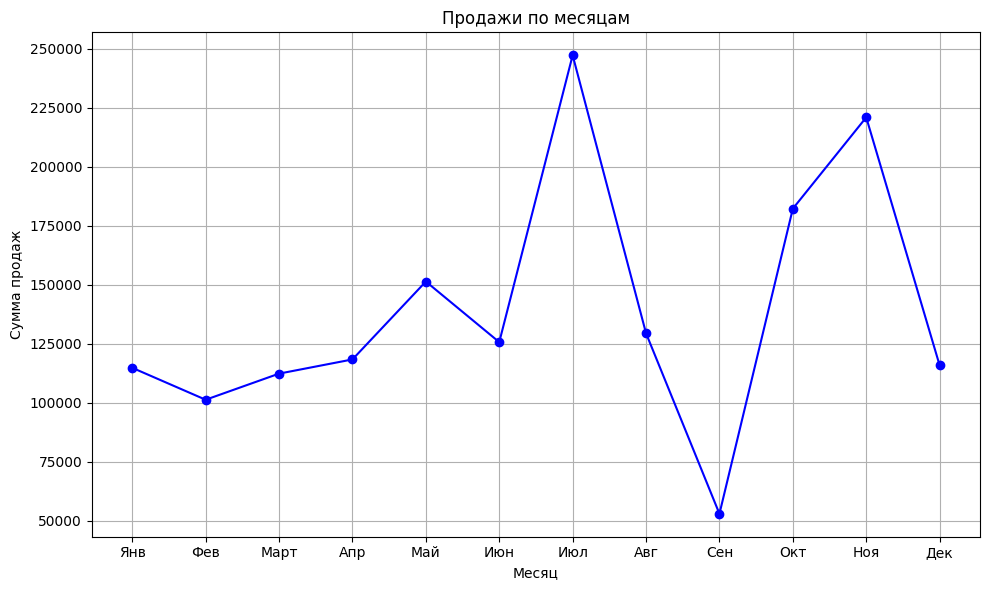

In [ ]:
# 2.1. Визуализация продаж по месяцам с Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Month'], sales_by_month['Sales'], marker='o', color='blue')
plt.title('Продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(ticks=sales_by_month['Month'], labels=['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# # 2.2. Альтернативная визуализация с Plotly Express
# px.line(sales_by_month, x='Month', y='Sales', title='Продажи по месяцам (Plotly Express)', labels={'Month': 'Месяц', 'Sales': 'Сумма продаж'})

In [ ]:
# # Добавляем названия месяцев для графика
# month_names = ['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

# # Визуализация с Plotly Express
# px.line(sales_by_month,
#         x='Month',
#         y='Sales',
#         title='Продажи по месяцам (Plotly Express)',
#         labels={'Month': 'Месяц', 'Sales': 'Сумма продаж'},
#         category_orders={'Month': list(range(1, 13))}).update_layout(
#             xaxis = dict(
#                 tickmode = 'array',
#                 tickvals = list(range(1, 13)),
#                 ticktext = month_names
#             )
#         )


In [ ]:
# 3. Анализ заказов по дням недели
orders_by_day = data_clean.groupby('DayName')['OrderDate'].count().reset_index().rename(columns={'OrderDate': 'OrderCount'})

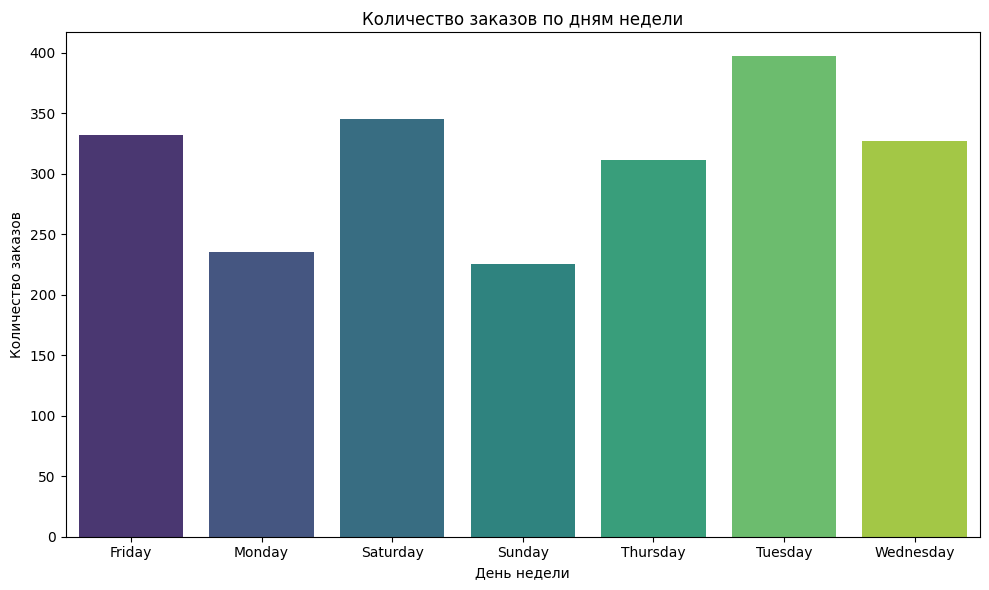

In [ ]:
# 3.1. Визуализация количества заказов по дням недели (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x='DayName', y='OrderCount', data=orders_by_day, palette='viridis')
plt.title('Количество заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.tight_layout()
plt.show()

In [ ]:
# 3.2. Альтернативная визуализация с hvPlot
orders_by_day.hvplot.bar(
    x='DayName', y='OrderCount', title='Количество заказов по дням недели (hvPlot)', xlabel='День недели', ylabel='Количество'
)

:Bars   [DayName]   (OrderCount)

In [ ]:
# Подготовка данных: группируем данные по месяцам и дням недели
orders_by_day_month = data_clean.groupby(['MonthName', 'DayName'])['OrderDate'].count().reset_index().rename(columns={'OrderDate': 'OrderCount'})

# Переводим месяцы на русский
month_names = {'January': 'Январь', 'February': 'Февраль', 'March': 'Март', 'April': 'Апрель',
               'May': 'Май', 'June': 'Июнь', 'July': 'Июль', 'August': 'Август',
               'September': 'Сентябрь', 'October': 'Октябрь', 'November': 'Ноябрь', 'December': 'Декабрь'}

orders_by_day_month['MonthName'] = orders_by_day_month['MonthName'].map(month_names)

# Упорядоченные дни недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Создаем категориальную переменную с нужным порядком
orders_by_day_month['DayName'] = pd.Categorical(orders_by_day_month['DayName'], categories=day_order, ordered=True)

# Сортируем данные по дням недели
orders_by_day_month = orders_by_day_month.sort_values('DayName')

# Построение интерактивной визуализации с виджетом для выбора месяца
orders_by_day_month.hvplot.bar(
    x='DayName',
    y='OrderCount',
    groupby='MonthName',  # Это добавит виджет для выбора месяца
    xlabel='День недели',
    ylabel='Количество заказов',
    title='Количество заказов по дням недели (выбор месяца)',
    color='blue'
)


ModuleNotFoundError: No module named 'jupyter_bokeh'

:DynamicMap   [MonthName]

## 4. Визуализация данных с помощью дэшбордов

### Дэшборд для анализа продаж по странам
Этот дэшборд позволит пользователям выбрать страну из выпадающего списка и визуализировать сумму продаж для выбранной страны.

In [ ]:
import panel as pn
import hvplot.pandas
path = "/content/Product Gallery.xlsx"
df = pd.read_excel(path, header=None)
# Расширение Panel
pn.extension()

# Подготовка данных: продажи по странам
sales_by_country = data_clean.groupby('Country')['Sales'].sum().reset_index()

# Создаем виджет для выбора страны
country_selector = pn.widgets.Select(name='Выберите страну', options=sales_by_country['Country'].unique().tolist())

# Функция для фильтрации данных по выбранной стране
@pn.depends(country_selector)
def sales_by_selected_country(country):
    sales = sales_by_country[sales_by_country['Country'] == country]
    return sales.hvplot.bar(x='Country', y='Sales', title=f'Продажи в {country}', color='orange')

# Дэшборд с выбором страны
dashboard = pn.Column(country_selector, sales_by_selected_country)
dashboard.servable()


Column
    [0] Select(name='Выберите страну', options=['Австрия', 'Англия', ...], value='Австрия')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [ ]:
import pandas as pd
import panel as pn
import plotly.graph_objects as go

# Расширение Panel с поддержкой Plotly
pn.extension('plotly')

# Группируем данные по странам и суммируем продажи
sales_by_country = data_clean.groupby('Country')['Sales'].sum().reset_index()

# Определяем минимальные и максимальные продажи
max_sales = sales_by_country['Sales'].max()
min_sales = sales_by_country['Sales'].min()

# Создаем виджет для выбора страны
country_selector = pn.widgets.Select(name='Выберите страну', options=sales_by_country['Country'].unique().tolist())

# Функция для построения круговой диаграммы
@pn.depends(country_selector)
def sales_pie_chart(country):
    sales = sales_by_country[sales_by_country['Country'] == country]['Sales'].values[0]

    # Рассчитываем процент от максимального значения
    percent = (sales - min_sales) / (max_sales - min_sales) * 100

    # Создаем круговую диаграмму с отображением процента в центре
    fig = go.Figure(go.Pie(
        values=[percent, 100 - percent],
        labels=['Продажи', ''],
        hole=0.7,  # Для создания пончика
        textinfo='none',  # Убираем подписи на сегментах
        marker=dict(colors=['orange', '#E8E8E8'])  # Оранжевый для продаж и серый для фона
    ))

    # Настраиваем текст в центре диаграммы (процент)
    fig.update_layout(
        annotations=[dict(text=f'{percent:.2f}%', x=0.5, y=0.5, font_size=40, showarrow=False)],  # Процент в центре
        showlegend=False,
        margin=dict(t=0, b=0, l=0, r=0)  # Минимальные отступы
    )

    # Возвращаем график и количество продаж
    return pn.Column(pn.panel(fig), pn.pane.Markdown(f"### Продажи: {sales:,.0f}"))

# Дэшборд с выбором страны и круговой диаграммой
dashboard_pie = pn.Column(country_selector, sales_pie_chart)
dashboard_pie.servable()

Column
    [0] Select(name='Выберите страну', options=['Австрия', 'Англия', ...], value='Австрия')
    [1] ParamFunction(function, _pane=Column, defer_load=False)

## Кейсы для самостоятельной работы

### 1. Анализ прибыли по клиентам
<b>Цель:</b> Определить, какие клиенты приносят наибольшую прибыль. <br>
<b>Данные:</b> Customer (Клиент), Profit (Прибыль). <br>
<b>Тип графика:</b> Столбчатая диаграмма.<br>
Дополнительно:
- отобразить топ-10 клиентов
- сгруппировать данные по клиентам и категориям товаров, суммируя продажи и количество
- построить интерактивную визуализацию с использованием groupby (Товары и суммы заказов для топ-10 клиентов)

<b>Данные:</b> Country (Страна), UnitsInStock (Количество на складе). <br>
<b>Тип графика:</b> Столбчатая диаграмма.<br>

### 3. Анализ продаж с учетом скидок по категориям товаров
<b>Цель:</b> Сравнить продажи товаров по категориям со скидками и без скидок. <br>
<b>Данные:</b> Category (Категория товара), Sales (Продажи), Discount (Скидка). <br>
<b>Тип графика:</b> Столбчатая диаграмма.<br>

### 4. Задание на креативность
<b>Цель:</b> Придумать и реализовать подсчет метрики, которая на ваш взгляд может как-то повлиять на бизнес. <br>
<b>Данные:</b> Можете пользоваться любыми данными (все колонки + приветствуется привлечение дополнительных колонок) <br>
<b>Тип графика:</b> Сами выбираете вид диаграммы - чем креативнее, тем лучше.<br>

In [9]:
import pandas as pd

file_path = 'Product Gallery.xlsx'

excel_data = pd.ExcelFile(file_path)

excel_data.sheet_names


['Лист1']

In [10]:
df = pd.read_excel(file_path, sheet_name='Лист1')

df.head()



,Address,CategoryID,Category,City,Customer Company,Shippers Company,Customer,Country,EmployeeID,Fax,...,Quantity,QuantityPerUnit,UnitCost,UnitPrice,UnitPrice (Products),UnitsInStock,UnitsOnOrder,Sales,Profit,City and Counry
0,Berliner Platz 43,2,Овощи,Мюнхен,Мюнхенские традиции,ТрансАвтоГруз,Dieter K?ln,Австрия,8,089-0877451,...,25,30,8.96,12.03,11.80,14,0,300.75,76.75,"Мюнхен, Австрия"
1,Berliner Platz 43,3,Кондитерские изделия,Мюнхен,Мюнхенские традиции,ТрансАвтоГруз,Dieter K?ln,Англия,8,089-0877451,...,24,1,26.13,33.55,31.23,15,0,805.20,178.08,"Мюнхен, Англия"
2,Berliner Platz 43,5,Мясо/Птица,Мюнхен,Мюнхенские традиции,ТрансАвтоГруз,Dieter K?ln,Аргентина,8,089-0877451,...,40,100,7.43,9.00,9.00,61,0,360.00,62.80,"Мюнхен, Аргентина"
3,Berliner Platz 43,8,Приправы,Мюнхен,Мюнхенские традиции,ТрансАвтоГруз,Dieter K?ln,Бельгия,8,089-0877451,...,20,20,6.45,7.99,8.00,112,0,159.80,30.80,"Мюнхен, Бельгия"
4,Berliner Platz 43,8,Приправы,Мюнхен,Мюнхенские традиции,ТрансАвтоГруз,Dieter K?ln,Бразилия,8,089-0877451,...,28,21,3.43,3.90,4.00,11,50,109.20,13.16,"Мюнхен, Бразилия"


Index(['Address', 'CategoryID', 'Category', 'City', 'Customer Company',
       'Shippers Company', 'Customer', 'Country', 'EmployeeID', 'Fax',
       'OrderDate', 'OrderID', 'Phone', 'PostalCode', 'ProductID', 'Product',
       'ShipperID', 'StateProvince', 'SupplierID', 'Discount', 'Freight',
       'Quantity', 'QuantityPerUnit', 'UnitCost', 'UnitPrice',
       'UnitPrice (Products)', 'UnitsInStock', 'UnitsOnOrder', 'Sales',
       'Profit', 'City and Counry'],
      dtype='object')


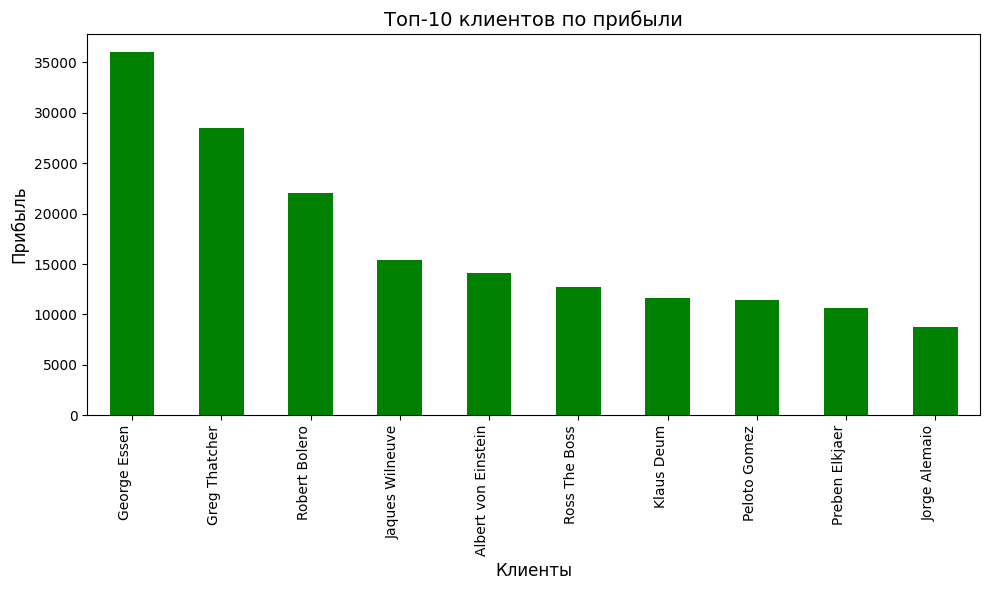

In [15]:
import matplotlib.pyplot as plt
path ='Product Gallery.xlsx'
xls = pd.ExcelFile(path)
xls.sheet_names
df = pd.read_excel(xls, sheet_name='Лист1')
df.head()
print(df.columns)


top_customers_profit = df.groupby('Customer')['Profit'].sum().nlargest(10)


plt.figure(figsize=(10, 6))
top_customers_profit.plot(kind='bar', color='green')


plt.title('Топ-10 клиентов по прибыли', fontsize=14)
plt.xlabel('Клиенты', fontsize=12)
plt.ylabel('Прибыль', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()


plt.show()


In [16]:
grouped_data = df.groupby(['Customer', 'Category'])[['Sales', 'Quantity']].sum()

top_10_customers = top_customers_profit.index
grouped_top_customers = grouped_data.loc[top_10_customers]

grouped_top_customers.head()


Sales  Quantity
Customer     Category                                
George Essen Кондитерские изделия  26841.85      1348
             Крупы                  6596.52       186
             Молочные продукты      1886.81       213
             Морепродукты          18203.77       354
             Мясо/Птица             7322.34       379

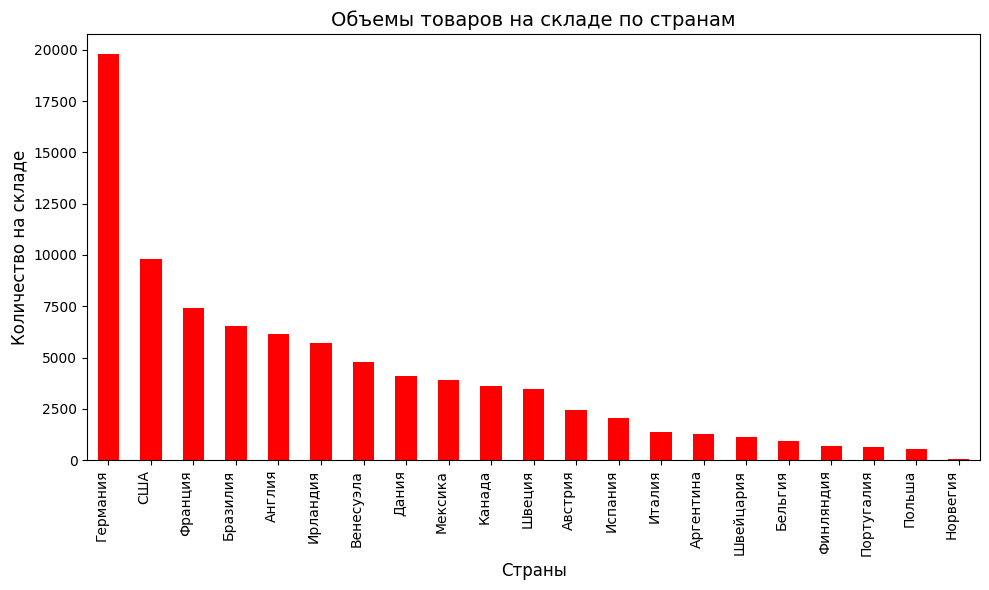

In [18]:
import matplotlib.pyplot as plt

country_stock = df.groupby('Country')['UnitsInStock'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
country_stock.plot(kind='bar', color='red')

plt.title('Объемы товаров на складе по странам', fontsize=14)
plt.xlabel('Страны', fontsize=12)
plt.ylabel('Количество на складе', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()


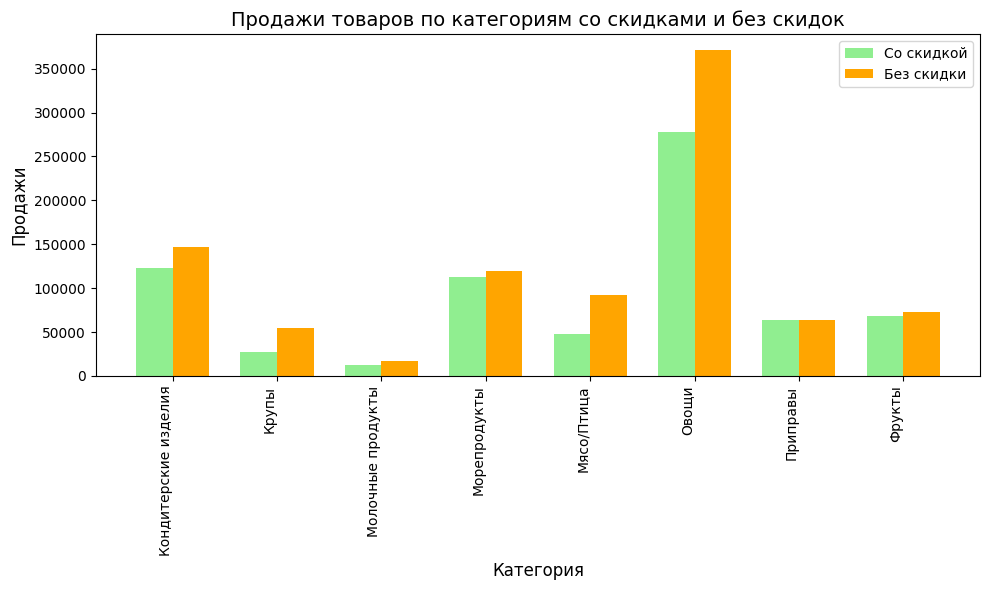

In [21]:
import matplotlib.pyplot as plt

sales_with_discount = df[df['Discount'] > 0].groupby('Category')['Sales'].sum()
sales_without_discount = df[df['Discount'] == 0].groupby('Category')['Sales'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(sales_with_discount))

ax.bar(index, sales_with_discount, bar_width, label='Со скидкой', color='lightgreen')
ax.bar([i + bar_width for i in index], sales_without_discount, bar_width, label='Без скидки', color='orange')

ax.set_xlabel('Категория', fontsize=12)
ax.set_ylabel('Продажи', fontsize=12)
ax.set_title('Продажи товаров по категориям со скидками и без скидок', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(sales_with_discount.index, rotation=90, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

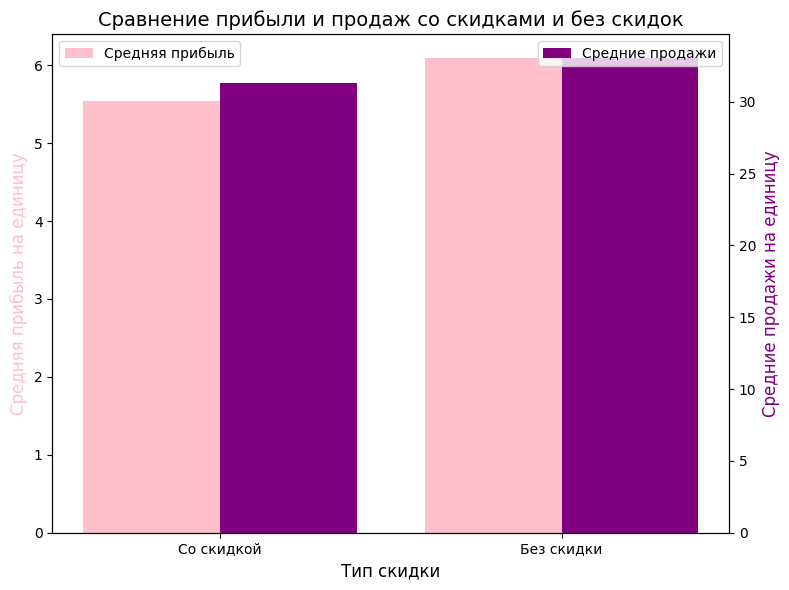

In [25]:
import matplotlib.pyplot as plt

discount_sales = df[df['Discount'] > 0]
no_discount_sales = df[df['Discount'] == 0]

avg_profit_discount = (discount_sales['Profit'] / discount_sales['Quantity']).mean()
avg_profit_no_discount = (no_discount_sales['Profit'] / no_discount_sales['Quantity']).mean()

avg_sales_discount = (discount_sales['Sales'] / discount_sales['Quantity']).mean()
avg_sales_no_discount = (no_discount_sales['Sales'] / no_discount_sales['Quantity']).mean()

labels = ['Со скидкой', 'Без скидки']
profit_values = [avg_profit_discount, avg_profit_no_discount]
sales_values = [avg_sales_discount, avg_sales_no_discount]

x = range(len(labels))

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(x, profit_values, width=0.4, label='Средняя прибыль', color='pink', align='center')

ax2 = ax1.twinx()
ax2.bar([i + 0.4 for i in x], sales_values, width=0.4, label='Средние продажи', color='purple', align='center')

ax1.set_xlabel('Тип скидки', fontsize=12)
ax1.set_ylabel('Средняя прибыль на единицу', fontsize=12, color='pink')
ax2.set_ylabel('Средние продажи на единицу', fontsize=12, color='purple')
ax1.set_xticks([i + 0.2 for i in x])
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Сравнение прибыли и продаж со скидками и без скидок', fontsize=14)
plt.tight_layout()

plt.show()


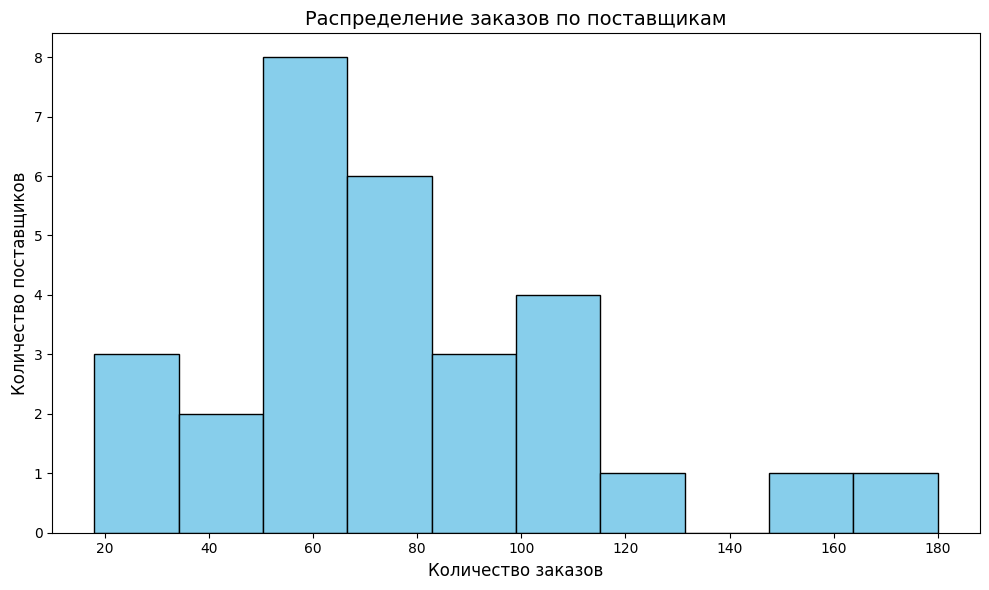

In [35]:
orders_by_supplier = df['SupplierID'].value_counts()

plt.figure(figsize=(10, 6))
orders_by_supplier.plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение заказов по поставщикам', fontsize=14)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Количество поставщиков', fontsize=12)
plt.tight_layout()
plt.show()
